In [40]:
from flickrapi import FlickrAPI
import numpy as np

with open('api_key.txt') as f:
    content = f.read()
    key,secret = content.split('\n')
# limit: 3600 queries per hour

In [41]:
all_photos_json = []

for year in np.arange(2000,2024,1):
    for month in [1+mmm for mmm in range(12)]:
        for chunk in range(3): #we split months into three
            start_day = 10*chunk + 1
            end_day   = 10*chunk + 10
            if chunk==2:
                if month==2:
                    end_day = 28 # we will always miss Feb 29 but it's okay
                elif month in [1,3,5,7,8,10,12]:
                    end_day = 31
                else:
                    end_day = 30
   
            min_taken_date = str(year) + '-' + str(month) + '-' + str(start_day)
            max_taken_date = str(year) + '-' + str(month) + '-' + str(end_day)
            #print( min_taken_date , max_taken_date )
            
            # connect to Flickr:
            flickr = FlickrAPI(key, secret, format='parsed-json')
            
            # We start with querying page 1.
            # The result tells us how many pages there are in total,
            # so if i is equalt to that number we can jump to another date chunk.
            i = 1
            while True:
                
                try:
                    result = flickr.photos.search(
                        per_page = 250,         
                        has_geo = 1,
                        min_taken_date = min_taken_date, 
                        max_taken_date = max_taken_date,
                        bbox = '12.248097,45.406999,12.43,45.51',
                        media = 'photos', # no videos
                        sort =  'date-taken-desc',
                        privacy_filter =1,
                        safe_search = 1,
                        extras = 'geo,url_n,date_taken',
                        page = i
                    )
                    photos_on_this_page = result['photos']
                    all_photos_json += photos_on_this_page['photo']

                    print( min_taken_date , max_taken_date , 'page:' , i,'photos:',len(photos_on_this_page['photo']))

                except:
                    pass

                # ten pages max:
                if i >= photos_on_this_page['pages'] or i>10:
                    break
                i += 1
                
            ### intermediate save to already explore:
            if month==12 and chunk==0:
                # convert list of json objects to a list of lists
                # so we can cast it into a pandas dataframe
                col_names = [ 'longitude' , 'latitude' , 'datetaken' , 'accuracy','owner']
                table = []
                for ccc in col_names:
                    table.append( [p[ccc] for p in all_photos_json] )
                table = list(map(list, zip(*table))) # transpose list of lists
                import pandas as pd
                df = pd.DataFrame(table, columns = col_names)
                df['longitude'] = df['longitude'].astype(float)
                df['latitude'] = df['latitude'].astype(float)
                # add transformed date/time columns:
                df['weekday'] = pd.to_datetime(df['datetaken']).dt.dayofweek
                df['year'] = pd.DatetimeIndex(df['datetaken']).year
                df['month'] = pd.DatetimeIndex(df['datetaken']).month
                df['dayofyear'] = pd.to_datetime(df['datetaken']).dt.dayofyear
                df['hour'] = pd.DatetimeIndex(df['datetaken']).hour
                df.to_csv('temp.csv',index=False)

2000-1-11 2000-1-20 page: 1 photos: 1
2000-1-21 2000-1-31 page: 1 photos: 46
2000-2-1 2000-2-10 page: 1 photos: 0
2000-2-11 2000-2-20 page: 1 photos: 12
2000-2-21 2000-2-28 page: 1 photos: 0
2000-3-1 2000-3-10 page: 1 photos: 2
2000-3-11 2000-3-20 page: 1 photos: 3
2000-3-21 2000-3-31 page: 1 photos: 0
2000-4-1 2000-4-10 page: 1 photos: 2
2000-4-11 2000-4-20 page: 1 photos: 0
2000-4-21 2000-4-30 page: 1 photos: 0
2000-5-1 2000-5-10 page: 1 photos: 1
2000-5-11 2000-5-20 page: 1 photos: 0
2000-5-21 2000-5-31 page: 1 photos: 3
2000-6-1 2000-6-10 page: 1 photos: 1
2000-6-11 2000-6-20 page: 1 photos: 1
2000-6-21 2000-6-30 page: 1 photos: 0
2000-7-1 2000-7-10 page: 1 photos: 2
2000-7-11 2000-7-20 page: 1 photos: 83
2000-7-21 2000-7-31 page: 1 photos: 1
2000-8-1 2000-8-10 page: 1 photos: 0
2000-8-11 2000-8-20 page: 1 photos: 0
2000-8-21 2000-8-31 page: 1 photos: 0
2000-9-1 2000-9-10 page: 1 photos: 0
2000-9-11 2000-9-20 page: 1 photos: 0
2000-9-21 2000-9-30 page: 1 photos: 0
2000-10-1 2000-10

2005-12-1 2005-12-10 page: 1 photos: 101
2005-12-11 2005-12-20 page: 1 photos: 19
2005-12-21 2005-12-31 page: 1 photos: 57
2006-1-1 2006-1-10 page: 1 photos: 30
2006-1-11 2006-1-20 page: 1 photos: 126
2006-1-21 2006-1-31 page: 1 photos: 34
2006-2-1 2006-2-10 page: 1 photos: 66
2006-2-11 2006-2-20 page: 1 photos: 71
2006-2-21 2006-2-28 page: 1 photos: 162
2006-3-1 2006-3-10 page: 1 photos: 73
2006-3-11 2006-3-20 page: 1 photos: 79
2006-3-21 2006-3-31 page: 1 photos: 73
2006-4-1 2006-4-10 page: 1 photos: 57
2006-4-11 2006-4-20 page: 1 photos: 135
2006-4-21 2006-4-30 page: 1 photos: 118
2006-5-1 2006-5-10 page: 1 photos: 40
2006-5-11 2006-5-20 page: 1 photos: 180
2006-5-21 2006-5-31 page: 1 photos: 29
2006-6-1 2006-6-10 page: 1 photos: 66
2006-6-11 2006-6-20 page: 1 photos: 55
2006-6-21 2006-6-30 page: 1 photos: 29
2006-7-1 2006-7-10 page: 1 photos: 39
2006-7-11 2006-7-20 page: 1 photos: 54
2006-7-21 2006-7-31 page: 1 photos: 38
2006-8-1 2006-8-10 page: 1 photos: 41
2006-8-11 2006-8-20 pa

2011-2-21 2011-2-28 page: 1 photos: 250
2011-2-21 2011-2-28 page: 2 photos: 81
2011-3-1 2011-3-10 page: 1 photos: 250
2011-3-1 2011-3-10 page: 2 photos: 250
2011-3-1 2011-3-10 page: 3 photos: 250
2011-3-1 2011-3-10 page: 4 photos: 159
2011-3-11 2011-3-20 page: 1 photos: 120
2011-3-21 2011-3-31 page: 1 photos: 100
2011-4-1 2011-4-10 page: 1 photos: 108
2011-4-11 2011-4-20 page: 1 photos: 188
2011-4-21 2011-4-30 page: 1 photos: 250
2011-4-21 2011-4-30 page: 2 photos: 31
2011-5-1 2011-5-10 page: 1 photos: 209
2011-5-11 2011-5-20 page: 1 photos: 250
2011-5-11 2011-5-20 page: 2 photos: 42
2011-5-21 2011-5-31 page: 1 photos: 199
2011-6-1 2011-6-10 page: 1 photos: 250
2011-6-1 2011-6-10 page: 2 photos: 127
2011-6-11 2011-6-20 page: 1 photos: 250
2011-6-11 2011-6-20 page: 2 photos: 18
2011-6-21 2011-6-30 page: 1 photos: 247
2011-7-1 2011-7-10 page: 1 photos: 171
2011-7-11 2011-7-20 page: 1 photos: 250
2011-7-11 2011-7-20 page: 2 photos: 103
2011-7-21 2011-7-31 page: 1 photos: 249
2011-7-21 201

2015-7-11 2015-7-20 page: 1 photos: 147
2015-7-21 2015-7-31 page: 1 photos: 130
2015-8-1 2015-8-10 page: 1 photos: 186
2015-8-11 2015-8-20 page: 1 photos: 215
2015-8-21 2015-8-31 page: 1 photos: 213
2015-9-1 2015-9-10 page: 1 photos: 128
2015-9-11 2015-9-20 page: 1 photos: 231
2015-9-21 2015-9-30 page: 1 photos: 180
2015-10-1 2015-10-10 page: 1 photos: 134
2015-10-11 2015-10-20 page: 1 photos: 159
2015-10-21 2015-10-31 page: 1 photos: 228
2015-11-1 2015-11-10 page: 1 photos: 156
2015-11-11 2015-11-20 page: 1 photos: 50
2015-11-21 2015-11-30 page: 1 photos: 47
2015-12-1 2015-12-10 page: 1 photos: 28
2015-12-11 2015-12-20 page: 1 photos: 46
2015-12-21 2015-12-31 page: 1 photos: 71
2016-1-1 2016-1-10 page: 1 photos: 101
2016-1-11 2016-1-20 page: 1 photos: 44
2016-1-21 2016-1-31 page: 1 photos: 250
2016-1-21 2016-1-31 page: 2 photos: 49
2016-2-1 2016-2-10 page: 1 photos: 250
2016-2-1 2016-2-10 page: 2 photos: 193
2016-2-11 2016-2-20 page: 1 photos: 128
2016-2-21 2016-2-28 page: 1 photos: 4

2020-9-21 2020-9-30 page: 2 photos: 71
2020-10-1 2020-10-10 page: 1 photos: 85
2020-10-11 2020-10-20 page: 1 photos: 31
2020-10-21 2020-10-31 page: 1 photos: 67
2020-11-1 2020-11-10 page: 1 photos: 6
2020-11-11 2020-11-20 page: 1 photos: 7
2020-11-21 2020-11-30 page: 1 photos: 13
2020-12-1 2020-12-10 page: 1 photos: 32
2020-12-11 2020-12-20 page: 1 photos: 3
2020-12-21 2020-12-31 page: 1 photos: 11
2021-1-1 2021-1-10 page: 1 photos: 3
2021-1-11 2021-1-20 page: 1 photos: 6
2021-1-21 2021-1-31 page: 1 photos: 8
2021-2-1 2021-2-10 page: 1 photos: 10
2021-2-11 2021-2-20 page: 1 photos: 14
2021-2-21 2021-2-28 page: 1 photos: 18
2021-3-1 2021-3-10 page: 1 photos: 7
2021-3-11 2021-3-20 page: 1 photos: 11
2021-3-21 2021-3-31 page: 1 photos: 26
2021-4-1 2021-4-10 page: 1 photos: 3
2021-4-11 2021-4-20 page: 1 photos: 3
2021-4-21 2021-4-30 page: 1 photos: 5
2021-5-1 2021-5-10 page: 1 photos: 3
2021-5-11 2021-5-20 page: 1 photos: 5
2021-5-21 2021-5-31 page: 1 photos: 34
2021-6-1 2021-6-10 page: 1 

In [43]:
# convert list of json objects to a list of lists
# so we can cast it into a pandas dataframe
col_names = [ 'longitude' , 'latitude' , 'datetaken' , 'accuracy','owner']
table = []
for ccc in col_names:
    table.append( [p[ccc] for p in all_photos_json] )
table = list(map(list, zip(*table))) # transpose list of lists


import pandas as pd
df = pd.DataFrame(table, columns = col_names)
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

# add transformed date/time columns:
df['weekday'] = pd.to_datetime(df['datetaken']).dt.dayofweek
df['year'] = pd.DatetimeIndex(df['datetaken']).year
df['month'] = pd.DatetimeIndex(df['datetaken']).month
df['dayofyear'] = pd.to_datetime(df['datetaken']).dt.dayofyear
df['hour'] = pd.DatetimeIndex(df['datetaken']).hour

df.to_csv('venezia_2000_2023.csv',index=False)
df

,longitude,latitude,datetaken,accuracy,owner,weekday,year,month,dayofyear,hour
0,12.339105,45.434057,2000-01-16 19:36:06,16,84509362@N00,6,2000,1,16,19
1,12.326864,45.445303,2000-01-28 05:14:05,16,25040945@N08,4,2000,1,28,5
2,12.326864,45.445303,2000-01-28 05:12:24,16,25040945@N08,4,2000,1,28,5
3,12.326864,45.445303,2000-01-26 02:48:18,16,25040945@N08,2,2000,1,26,2
4,12.326864,45.445303,2000-01-26 02:33:43,16,25040945@N08,2,2000,1,26,2
...,...,...,...,...,...,...,...,...,...,...
95727,12.333822,45.431924,2023-11-01 08:39:07,15,63270671@N03,2,2023,11,305,8
95728,12.340262,45.439035,2023-11-01 07:50:56,15,63270671@N03,2,2023,11,305,7
95729,12.328866,45.431810,2023-11-14 16:28:30,15,144992359@N06,1,2023,11,318,16
95730,12.340261,45.434337,2023-11-12 18:07:28,16,41114207@N06,6,2023,11,316,18


(12.3, 12.37, 45.42, 45.46)

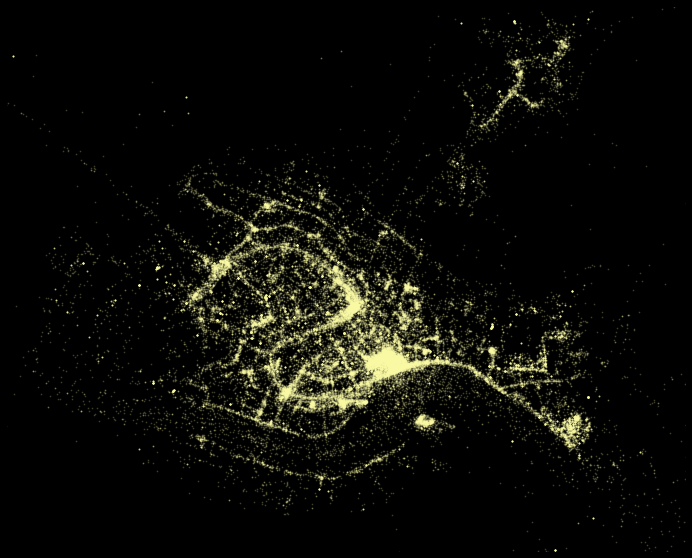

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10),facecolor='k')
plt.subplot(aspect=1./np.sin(np.radians(np.median(df['latitude']))))
plt.scatter(df['longitude'],df['latitude'],s=1,alpha=0.15,c='#FFFFAA')
plt.xlim(12.3,12.37)
plt.ylim(45.42,45.46)
plt.axis('off')